In [6]:
import numpy as np
import pandas as pd
from os import walk
import requests
import json
import math

In [2]:
book_details = pd.read_csv("book_cover_details\\BookDetails.csv")

In [3]:
book_details.head()

,Unnamed: 0,book_id,isbn,text_reviews_count,country_code,average_rating,link,authors,publisher,publication_year,image_url,ratings_count,title,genre,genre1
0,0,10365,375806814,7868,US,4.04,https://www.goodreads.com/book/show/10365.Wher...,"[{'author_id': '6810', 'role': ''}]",Yearling,2000.0,https://images.gr-assets.com/books/1166154337m...,271951,Where the Red Fern Grows,['children'],children
1,1,10959,1857993284,4324,US,3.88,https://www.goodreads.com/book/show/10959.Soph...,"[{'author_id': '1388082', 'role': ''}, {'autho...",Phoenix,1995.0,https://images.gr-assets.com/books/1343459906m...,111215,Sophie's World,['children'],children
2,2,5,043965548X,28561,US,4.53,https://www.goodreads.com/book/show/5.Harry_Po...,"[{'author_id': '1077326', 'role': ''}, {'autho...",Scholastic Inc.,2004.0,https://images.gr-assets.com/books/1499277281m...,1876252,Harry Potter and the Prisoner of Azkaban (Harr...,['children'],children
3,3,11387515,375869026,31536,US,4.43,https://www.goodreads.com/book/show/11387515-w...,"[{'author_id': '4859212', 'role': ''}]",Knopf,2012.0,https://images.gr-assets.com/books/1309285027m...,255461,Wonder (Wonder #1),"['children', 'young_adult']",children_YoungAdult
4,4,438492,64407683,3313,US,3.91,https://www.goodreads.com/book/show/438492.The...,"[{'author_id': '36746', 'role': ''}, {'author_...",HarperCollins Publishers,2000.0,https://images.gr-assets.com/books/1320705923m...,121250,The Wide Window (A Series of Unfortunate Event...,['children'],children


In [4]:
book_details.genre.unique()

array(["['children']", "['children', 'young_adult']",
       "['children', 'fantasy_paranormal']",
       "['children', 'mystery_thriller_crime']",
       "['children', 'fantasy_paranormal', 'young_adult']",
       "['children', 'comics-graphic']",
       "['children', 'history_biography']", "['children', 'poetry']",
       "['comics-graphic']", "['comics-graphic', 'fantasy_paranormal']",
       "['comics-graphic', 'romance']",
       "['comics-graphic', 'young_adult']",
       "['comics-graphic', 'history_biography']",
       "['comics-graphic', 'fantasy_paranormal', 'romance']",
       "['comics-graphic', 'poetry']", "['fantasy_paranormal']",
       "['fantasy_paranormal', 'romance']",
       "['fantasy_paranormal', 'young_adult']",
       "['fantasy_paranormal', 'romance', 'young_adult']",
       "['fantasy_paranormal', 'mystery_thriller_crime', 'young_adult']",
       "['fantasy_paranormal', 'history_biography']",
       "['fantasy_paranormal', 'history_biography', 'romance']",
   

In [5]:
len(book_details.book_id)

19293

In [6]:
max(book_details.book_id)

36307629

In [7]:
book_isbn = book_details.isbn

In [8]:
book_isbn.sort_values

<bound method Series.sort_values of 0         375806814
1        1857993284
2        043965548X
3         375869026
4          64407683
            ...    
19288           NaN
19289           NaN
19290    014132693X
19291    1554683394
19292           NaN
Name: isbn, Length: 19293, dtype: object>

In [10]:
image_path = "book_cover_image"
image_names = next(walk(image_path), (None, None, []))[2]

In [11]:
len(image_names)

19293

In [7]:
DATA_DIR = "book-covers"

CATEGORIES = next(os.walk(DATA_DIR), (None, None, []))[1]
print(CATEGORIES)

['Art-Photography', 'Biography', 'Business-Finance-Law', 'Childrens-Books', 'Computing', 'Crafts-Hobbies', 'Crime-Thriller', 'Dictionaries-Languages', 'Entertainment', 'Food-Drink', 'Graphic-Novels-Anime-Manga', 'Health', 'History-Archaeology', 'Home-Garden', 'Humour', 'Medical', 'Mind-Body-Spirit', 'Natural-History', 'Personal-Development', 'Poetry-Drama', 'Reference', 'Religion', 'Romance', 'Science-Fiction-Fantasy-Horror', 'Science-Geography', 'Society-Social-Sciences', 'Sport', 'Stationery', 'Teaching-Resources-Education', 'Technology-Engineering', 'Teen-Young-Adult', 'Transport', 'Travel-Holiday-Guides']


In [5]:
#google search for the book using google books API
def google_book_search(search_terms):
    url = 'https://www.googleapis.com/books/v1/volumes?q=' +search_terms + '&maxResults=40'
    response = requests.get(url, verify = False)
    # load data using Python JSON module
    r = response.content
    data = json.loads(r)
    # Normalizing data
    df = pd.json_normalize(data, record_path =['items'])
    first_row = df.iloc[0]
    first_row_df = df.iloc[:1]
    first_row_df['search_term']=search_terms
    return first_row_df;

In [8]:
category = CATEGORIES[0].split("-")

category

['Art', 'Photography']

In [14]:
book_names = list(filter(None, book_details['title']))
print(book_names[:10])

['Where the Red Fern Grows', "Sophie's World", 'Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)', 'Wonder (Wonder #1)', 'The Wide Window (A Series of Unfortunate Events, #3)', 'The Reptile Room (A Series of Unfortunate Events, #2)', 'The Bad Beginning (A Series of Unfortunate Events, #1)', 'The Invention of Hugo Cabret', 'The Cat in the Hat', 'Green Eggs and Ham']


In [15]:
book_isbn = list(filter(None, book_details['isbn']))
print(book_isbn[:10])

['375806814', '1857993284', '043965548X', '375869026', '64407683', '439206480', '439206472', '439813786', '039480001X', '394800168']


In [16]:
info = pd.DataFrame()
for books in book_names[:10]:
    print(books)
    info = info.append(google_book_search(books))

Where the Red Fern Grows


e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\urllib3\connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\urllib3\connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.googleapis.com'. Adding certificate verification is strongly advised. See: https://urlli

Sophie's World
Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)


e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\urllib3\connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


Wonder (Wonder #1)


e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\urllib3\connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


The Wide Window (A Series of Unfortunate Events, #3)


e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\urllib3\connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


The Reptile Room (A Series of Unfortunate Events, #2)


e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\urllib3\connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


The Bad Beginning (A Series of Unfortunate Events, #1)


e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\urllib3\connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


The Invention of Hugo Cabret


e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\urllib3\connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


The Cat in the Hat


e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\urllib3\connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


Green Eggs and Ham


e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\urllib3\connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


In [17]:
info_isbn = pd.DataFrame()
for books in book_isbn[:10]:
    books = 'isbn: ' + books
    print(books)
    info_isbn = info_isbn.append(google_book_search(books))

isbn: 375806814


e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\urllib3\connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\urllib3\connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.googleapis.com'. Adding certificate verification is strongly advised. See: https://urlli

isbn: 1857993284
isbn: 043965548X


e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\urllib3\connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


isbn: 375869026


e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\urllib3\connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


isbn: 64407683


e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\urllib3\connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


isbn: 439206480


e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\urllib3\connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


isbn: 439206472


e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\urllib3\connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


isbn: 439813786


e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\urllib3\connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


isbn: 039480001X


e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\urllib3\connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


isbn: 394800168


e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\urllib3\connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


In [18]:
info.columns

Index(['kind', 'id', 'etag', 'selfLink', 'volumeInfo.title',
       'volumeInfo.authors', 'volumeInfo.publisher',
       'volumeInfo.publishedDate', 'volumeInfo.description',
       'volumeInfo.industryIdentifiers', 'volumeInfo.readingModes.text',
       'volumeInfo.readingModes.image', 'volumeInfo.pageCount',
       'volumeInfo.printType', 'volumeInfo.categories',
       'volumeInfo.averageRating', 'volumeInfo.ratingsCount',
       'volumeInfo.maturityRating', 'volumeInfo.allowAnonLogging',
       'volumeInfo.contentVersion',
       'volumeInfo.panelizationSummary.containsEpubBubbles',
       'volumeInfo.panelizationSummary.containsImageBubbles',
       'volumeInfo.imageLinks.smallThumbnail',
       'volumeInfo.imageLinks.thumbnail', 'volumeInfo.language',
       'volumeInfo.previewLink', 'volumeInfo.infoLink',
       'volumeInfo.canonicalVolumeLink', 'saleInfo.country',
       'saleInfo.saleability', 'saleInfo.isEbook', 'saleInfo.listPrice.amount',
       'saleInfo.listPrice.currency

In [19]:
info_isbn.columns

Index(['kind', 'id', 'etag', 'selfLink', 'volumeInfo.title',
       'volumeInfo.authors', 'volumeInfo.publisher',
       'volumeInfo.publishedDate', 'volumeInfo.description',
       'volumeInfo.industryIdentifiers', 'volumeInfo.readingModes.text',
       'volumeInfo.readingModes.image', 'volumeInfo.pageCount',
       'volumeInfo.printType', 'volumeInfo.categories',
       'volumeInfo.maturityRating', 'volumeInfo.allowAnonLogging',
       'volumeInfo.contentVersion',
       'volumeInfo.panelizationSummary.containsEpubBubbles',
       'volumeInfo.panelizationSummary.containsImageBubbles',
       'volumeInfo.imageLinks.smallThumbnail',
       'volumeInfo.imageLinks.thumbnail', 'volumeInfo.language',
       'volumeInfo.previewLink', 'volumeInfo.infoLink',
       'volumeInfo.canonicalVolumeLink', 'saleInfo.country',
       'saleInfo.saleability', 'saleInfo.isEbook', 'saleInfo.listPrice.amount',
       'saleInfo.listPrice.currencyCode', 'saleInfo.retailPrice.amount',
       'saleInfo.retailP

In [20]:
info['search_term']

0                             Where the Red Fern Grows
0                                       Sophie's World
0    Harry Potter and the Prisoner of Azkaban (Harr...
0                                   Wonder (Wonder #1)
0    The Wide Window (A Series of Unfortunate Event...
0    The Reptile Room (A Series of Unfortunate Even...
0    The Bad Beginning (A Series of Unfortunate Eve...
0                         The Invention of Hugo Cabret
0                                   The Cat in the Hat
0                                   Green Eggs and Ham
Name: search_term, dtype: object

In [21]:
info_isbn['search_term']

0     isbn: 375806814
0    isbn: 1857993284
0    isbn: 043965548X
0     isbn: 375869026
0      isbn: 64407683
0     isbn: 439206480
0     isbn: 439206472
0     isbn: 439813786
0    isbn: 039480001X
0     isbn: 394800168
Name: search_term, dtype: object

In [22]:
print(info.shape)
google_data = info[['id', 'selfLink', 'volumeInfo.title',
       'volumeInfo.subtitle', 'volumeInfo.authors', 'volumeInfo.publisher',
       'volumeInfo.publishedDate', 'volumeInfo.description','volumeInfo.pageCount', 'volumeInfo.categories',
       'volumeInfo.imageLinks.smallThumbnail','volumeInfo.imageLinks.thumbnail','saleInfo.country', 'saleInfo.retailPrice.amount',
       'saleInfo.retailPrice.currencyCode', 'search_term'
     ]]

(10, 52)


In [23]:
print(info.shape)
google_data2 = info_isbn[['id', 'selfLink', 'volumeInfo.title',
       'volumeInfo.subtitle', 'volumeInfo.authors', 'volumeInfo.publisher',
       'volumeInfo.publishedDate', 'volumeInfo.description','volumeInfo.pageCount', 'volumeInfo.categories',
       'volumeInfo.imageLinks.smallThumbnail','volumeInfo.imageLinks.thumbnail','saleInfo.country', 'saleInfo.retailPrice.amount',
       'saleInfo.retailPrice.currencyCode', 'search_term'
     ]]

(10, 52)


In [24]:
google_data = (google_data).reset_index()

In [25]:
google_data2 = (google_data2).reset_index()

In [26]:
google_data['volumeInfo.title']

0                             Where the Red Fern Grows
1                                       Sophie's World
2             Harry Potter and the Prisoner of Azkaban
3                                               Wonder
4    A Series of Unfortunate Events #3: The Wide Wi...
5    A Series of Unfortunate Events 02. The Reptile...
6    A Series of Unfortunate Events 01. The Bad Beg...
7                         The Invention of Hugo Cabret
8                                   The Cat in the Hat
9                                   Green Eggs and Ham
Name: volumeInfo.title, dtype: object

In [27]:
google_data2['volumeInfo.title']

0                            As You Like It
1                            Sophie's World
2                 Read On-- Fantasy Fiction
3                            As You Like It
4    A Field Guide to the Classroom Library
5                            As You Like It
6                            As You Like It
7                            As You Like It
8                      Practical PostgreSQL
9                            As You Like It
Name: volumeInfo.title, dtype: object

In [28]:
print(google_data['volumeInfo.imageLinks.thumbnail'].replace("zoom=1", "zoom=0"))
print(google_data2['volumeInfo.imageLinks.thumbnail'].replace("zoom=1", "zoom=0"))


0    http://books.google.com/books/content?id=BrgeE...
1    http://books.google.com/books/content?id=jb9NG...
2    http://books.google.com/books/content?id=H5mI2...
3    http://books.google.com/books/content?id=p5ozD...
4    http://books.google.com/books/content?id=lYVXs...
5    http://books.google.com/books/content?id=18BtL...
6    http://books.google.com/books/content?id=fdFiL...
7    http://books.google.com/books/content?id=jcxyG...
8    http://books.google.com/books/content?id=ia7xA...
9    http://books.google.com/books/content?id=ZK7xA...
Name: volumeInfo.imageLinks.thumbnail, dtype: object
0    http://books.google.com/books/content?id=8oGbD...
1    http://books.google.com/books/content?id=jb9NG...
2    http://books.google.com/books/content?id=Yrwx7...
3    http://books.google.com/books/content?id=8oGbD...
4    http://books.google.com/books/content?id=lBVKA...
5    http://books.google.com/books/content?id=8oGbD...
6    http://books.google.com/books/content?id=8oGbD...
7    http://

The image from google book api results

Searching by book names yield better results than searching by isbn.

In [29]:
from PIL import Image
from urllib import request

BrgeEEykkP8C


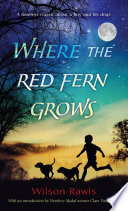

jb9NGu6dEdkC


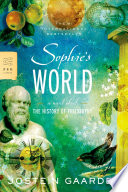

H5mI2wcC7vgC


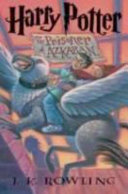

p5ozDwAAQBAJ


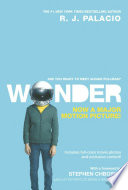

lYVXswEACAAJ


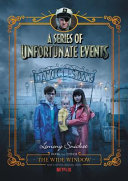

18BtLwEACAAJ


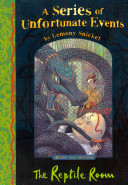

fdFiLwEACAAJ


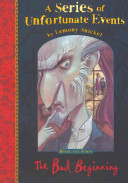

jcxyGgAACAAJ


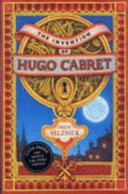

ia7xAwAAQBAJ


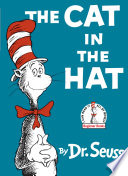

ZK7xAwAAQBAJ


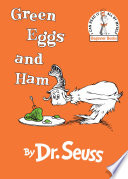

In [30]:
for id, book_cover_link in zip(google_data['id'], google_data['volumeInfo.imageLinks.thumbnail']):
    re = request.urlopen(book_cover_link)
    image = Image.open(re)
    print(id)
    display(image)

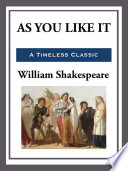

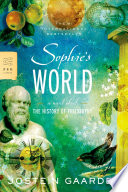

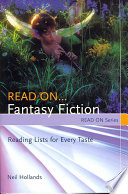

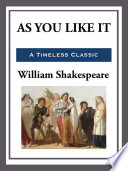

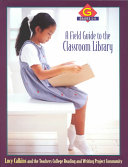

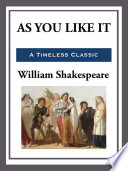

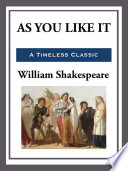

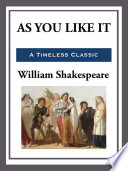

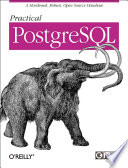

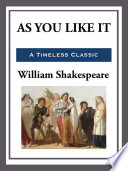

In [31]:
for book_cover_link in google_data2['volumeInfo.imageLinks.thumbnail']:
    re = request.urlopen(book_cover_link)
    image = Image.open(re)
    print()
    display(image)